<h1 style='text-align:center; font-weight:bold'>
    PCA: Análisis de Componentes Principales.
</h1>

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pd.options.display.max_columns = False

## **Datos**

In [3]:
df = sns.load_dataset('iris')

In [9]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('species', axis=1))

In [10]:
covariance_matrix = np.cov(scaled.T)

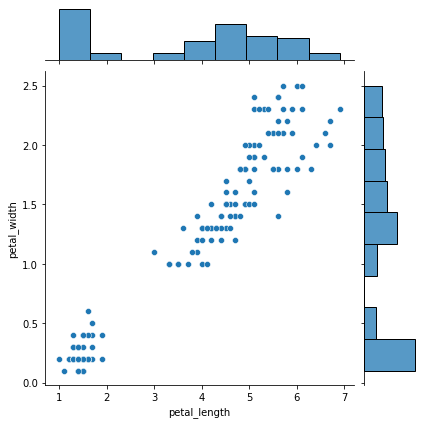

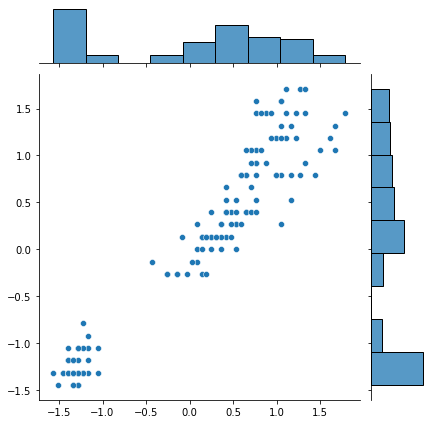

In [16]:
sns.jointplot(data=df, x='petal_length', y='petal_width')
sns.jointplot(x=scaled[:,2], y=scaled[:,3])

plt.show()

### **Descomponer una matriz**

In [17]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

#### **Valores propios**

In [18]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

#### **Vectores propios**

In [19]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [23]:
variance_explained = []

for i in eigen_values:
    variance_explained.append((i/eigen_values.sum()*100))

In [27]:
variance_explained

[72.96244541329992, 22.85076178670171, 3.6689218892828683, 0.517870910715499]

### **PCA**

In [37]:
pca = PCA(n_components=2)

In [38]:
pca.fit(scaled)

PCA(n_components=2)

In [51]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [41]:
reduced_scaled = pca.transform(scaled)

In [53]:
df['pca_1'] = reduced_scaled[:, 0]
df['pca_2'] = reduced_scaled[:, 1]

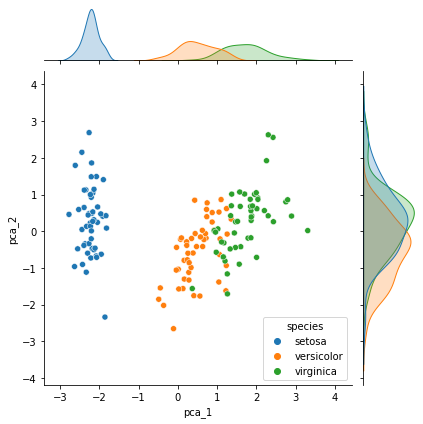

In [57]:
sns.jointplot(data=df, x='pca_1', y='pca_2', hue='species')

plt.show()

### **Modelos**

In [72]:
df['target'] = np.where(df['species'] == 'setosa', 
                        1, 
                        np.where(df['species'] == 'versicolor', 
                                 2, 
                                 np.where(df['species'] == 'virginica', 3, 0)))

#### **Modelo Inicial**

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['species', 'target', 'pca_1', 'pca_2'], axis=1), df['target'], test_size=0.2, random_state=13)

In [91]:
model_base = LogisticRegression(max_iter=1000)
model_base.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [93]:
y_pred = model_base.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.89      1.00      0.94         8
           3       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



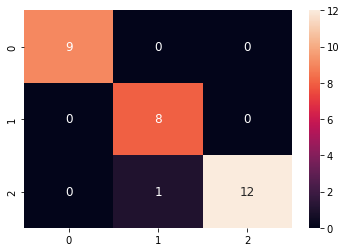

In [109]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={'size':12})

plt.show()

#### **Modelo PCA**

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df[['pca_1', 'pca_2']], df['target'], test_size=0.2, random_state=13)

In [114]:
model_base = LogisticRegression(max_iter=1000)
model_base.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [115]:
y_pred = model_base.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.73      1.00      0.84         8
           3       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30



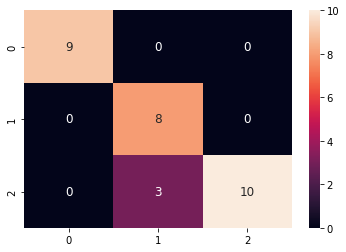

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={'size':12})

plt.show()